In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

### Khởi tạo data

In [85]:
N = 200
a = 5
b = -10
# tien = 5*so_luong_khach - 10
so_luong_khach = np.arange(50,50+N,5)
print(so_luong_khach)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245]


In [86]:
tien = np.random.normal(0,40, [N//5])
doanh_thu = tien + a*so_luong_khach + b

print(doanh_thu)

[ 321.759  318.884  264.516  343.315  274.289  384.318  370.386  309.672
  446.679  402.318  514.968  647.098  586.078  569.122  582.283  624.772
  590.401  701.337  677.604  701.974  768.097  755.273  748.035  846.915
  846.173  851.291  879.936  908.498  950.302  955.629 1021.207 1040.783
 1010.015 1094.763 1102.151 1183.863 1204.344 1209.726 1137.094 1231.105]


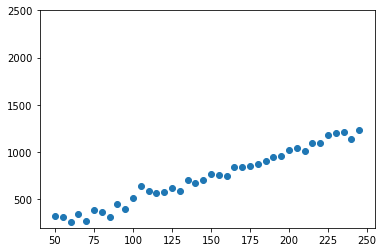

In [87]:
fig, ax = plt.subplots(figsize=(6,4), num=1)
plt.ylim([200, 2500])
ax.scatter(so_luong_khach, doanh_thu)
plt.show()

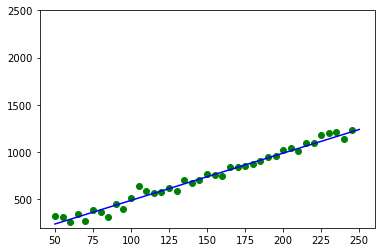

In [91]:
# Hàm vẽ phương trình y = ax + b
def Ve_phuong_trinh(heso_a, heso_b, mau='red'):
    x1,x2 = 50, 250
    
    y1 = heso_a*x1 + heso_b
    y2 = heso_a*x2 + heso_b
    plt.plot([x1,x2],[y1,y2], color=mau)
    

fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2500])
plt.scatter(so_luong_khach, doanh_thu, color="green")

Ve_phuong_trinh(a,b, mau="blue")
plt.show()

# 1. Linear Regression

In [89]:
# Khởi tạo và kiểm tra mô hình
khoi_tao_A = 10.
khoi_tao_B = 10.

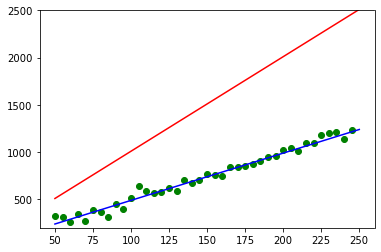

In [90]:
fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2500])
plt.scatter(so_luong_khach, doanh_thu, color="green")

Ve_phuong_trinh(a,b, mau="blue")
Ve_phuong_trinh(khoi_tao_A, khoi_tao_B, mau="red")

plt.show()

In [92]:
# Hàm tính loss
def tinh_loss(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    return mse

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def linear_regression(x, y, he_so_huan_luyen=0.00001, so_lan_hoc=200):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        error = tinh_loss(y_du_doan, y)
        if i%10 == 0: print(error)
        
        # Tính gradient
        gradient_a = (x * 1e-5*error).sum()
        gradient_b = 1e-1*error
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = linear_regression(so_luong_khach, doanh_thu)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

646556.7641680397
198970.78962863493
96851.91089428627
57527.16125204507
38257.52919491581
27379.515770864615
20634.915351555897
16163.774338229854
13047.221941044345
10788.395852414136
9099.341843392403
7803.74444440348
6788.706438110782
5979.20424353316
5323.796838213813
4786.256429108623
4340.472615478645
3967.243880119837
3652.1975363866172
3384.4061875632287
Gia tri cua a va b sau khi hoc: 5.202498020792307 1.8686407132072975


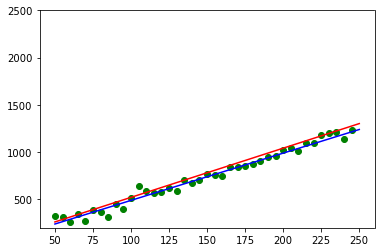

In [93]:
fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2500])

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(new_a, new_b, mau="red")

plt.show()

# 2. Ridge Regression

In [98]:
# khoi_tao_A = 10.
# khoi_tao_B = 10.

lam = 100.

def tinh_loss(predictions, targets, a, b):
    loss = np.mean((predictions - targets) ** 2) + lam*(a**2 + b**2)
    return loss

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def linear_regression(x, y, he_so_huan_luyen=0.00001, so_lan_hoc=200):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        error = tinh_loss(y_du_doan, y, a, b)
        #if i%10 == 0: print(error)
        
        # Tính gradient
        gradient_a = (x * 1e-5*error).sum()
        gradient_b = 1e-1*error
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = linear_regression(so_luong_khach, doanh_thu)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

Gia tri cua a va b sau khi hoc: 5.030309076507387 1.5767950449277746


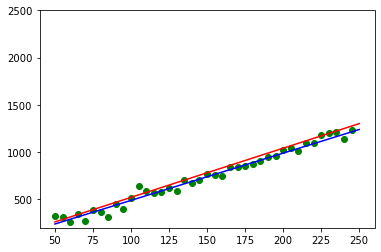

In [95]:
fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2500])

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(new_a, new_b, mau="red")

plt.show()

# 3. Lasso Regression

In [99]:
khoi_tao_A = 10.
khoi_tao_B = 10.

lam = 100.

def tinh_loss(predictions, targets, a, b):
    loss = np.mean((predictions - targets) ** 2) + lam*(np.abs(a) + np.abs(b))
    return loss

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def linear_regression(x, y, he_so_huan_luyen=0.00001, so_lan_hoc=200):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        error = tinh_loss(y_du_doan, y, a, b)
        #if i%10 == 0: print(error)
        
        # Tính gradient
        gradient_a = (x * 1e-5*error).sum()
        gradient_b = 1e-1*error
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = linear_regression(so_luong_khach, doanh_thu)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

Gia tri cua a va b sau khi hoc: 5.166020236535657 1.8068139602299245


# 4. ElasticNet Regression

In [102]:
# khoi_tao_A = 10.
khoi_tao_B = 10.

lam1 = 500
lam2 = 100


def tinh_loss(predictions, targets, a, b):
    loss = np.mean((predictions - targets) ** 2) + lam1*(np.abs(a) + np.abs(b)) + \
                                        lam2*(a**2 + b**2)
    return loss

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def linear_regression(x, y, he_so_huan_luyen=0.00001, so_lan_hoc=200):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        error = tinh_loss(y_du_doan, y, a, b)
        #if i%10 == 0: print(error)
        
        # Tính gradient
        gradient_a = (x * 1e-5*error).sum()
        gradient_b = 1e-1*error
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = linear_regression(so_luong_khach, doanh_thu)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

Gia tri cua a va b sau khi hoc: 4.797571738839582 1.1823249810840344
